In [1]:
!pip3 install pyspark


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip


### Step 1: Data Acquisition


For this example, let's assume we are working with a dataset of tweets stored in a JSON format. You can download a sample dataset or use APIs like Twitter API to fetch real-time data.

In [2]:
!export JAVA_HOME=/opt/homebrew/opt/openjdk@11
!export PATH=$JAVA_HOME/bin:$PATH

!export SPARK_HOME=/opt/homebrew/Cellar/apache-spark/3.5.1/libexec
!export PATH=$SPARK_HOME/bin:$PATH


In [6]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("SocialMediaAnalytics") \
    .getOrCreate()

# Load data (assuming JSON format)
tweets_df = spark.read.option("multiline","true").json("./tweets.json")

# Display schema and sample data
tweets_df.printSchema()
tweets_df.show(5)


root
 |-- created_at: string (nullable = true)
 |-- id: long (nullable = true)
 |-- text: string (nullable = true)
 |-- user: struct (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- username: string (nullable = true)

+--------------------+---+--------------------+------------+
|          created_at| id|                text|        user|
+--------------------+---+--------------------+------------+
|2024-07-10T08:30:00Z|  1|Excited to start ...|{101, user1}|
|2024-07-10T09:15:00Z|  2|Just finished an ...|{102, user2}|
|2024-07-10T10:00:00Z|  3|PySpark makes big...|{103, user3}|
|2024-07-10T11:45:00Z|  4|Struggling a bit ...|{104, user4}|
|2024-07-10T12:30:00Z|  5|Analyzing social ...|{105, user5}|
+--------------------+---+--------------------+------------+



### Step 2: Data Preprocessing


Perform basic preprocessing steps such as tokenization, removing stop words, and converting text to lowercase.

In [8]:
!pip3 install numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 9.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 7.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 7.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 7.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip


In [9]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import col, lower, regexp_replace

# Clean text data
tweets_cleaned = tweets_df.select(lower(regexp_replace('text', "[^a-zA-Z\\s]", "")).alias('text'))

# Tokenize text
tokenizer = Tokenizer(inputCol='text', outputCol='words')
tweets_tokenized = tokenizer.transform(tweets_cleaned)

# Remove stop words
remover = StopWordsRemover(inputCol='words', outputCol='filtered_words')
tweets_final = remover.transform(tweets_tokenized)

tweets_final.show(5)


+--------------------+--------------------+--------------------+
|                text|               words|      filtered_words|
+--------------------+--------------------+--------------------+
|excited to start ...|[excited, to, sta...|[excited, start, ...|
|just finished an ...|[just, finished, ...|[finished, amazin...|
|pyspark makes big...|[pyspark, makes, ...|[pyspark, makes, ...|
|struggling a bit ...|[struggling, a, b...|[struggling, bit,...|
|analyzing social ...|[analyzing, socia...|[analyzing, socia...|
+--------------------+--------------------+--------------------+



### Step 3: Analysis


Perform basic analytics such as word frequency analysis or sentiment analysis.

In [12]:
!pip3 install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 924.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.5/278.5 kB 1.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 1.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 1.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip


In [13]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from textblob import TextBlob

# Define a function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    """
    Function to analyze sentiment of a text using TextBlob.
    Returns:
        1 if sentiment is positive
        0 if sentiment is neutral
        -1 if sentiment is negative
    """
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    
    if polarity > 0:
        return 1
    elif polarity == 0:
        return 0
    else:
        return -1

# Define UDF (User Defined Function) for sentiment analysis
get_sentiment_udf = udf(analyze_sentiment, IntegerType())

# Example usage within PySpark DataFrame
# Assuming 'tweets_cleaned' DataFrame from previous steps

# Apply sentiment analysis function to each tweet
tweets_with_sentiment = tweets_cleaned.withColumn('sentiment', get_sentiment_udf('text'))

# Show sample results
tweets_with_sentiment.select('text', 'sentiment').show(5, truncate=False)


+----------------------------------------------------------------+---------+
|text                                                            |sentiment|
+----------------------------------------------------------------+---------+
|excited to start my new project with pyspark datascience pyspark|1        |
|just finished an amazing tutorial on pyspark its so powerful    |1        |
|pyspark makes big data processing fun and efficient             |1        |
|struggling a bit with pysparks streaming api any tips           |0        |
|analyzing social media data with pyspark today dataanalytics    |1        |
+----------------------------------------------------------------+---------+



### Step 4: Visualization (Optional)

Visualize the results using libraries like Matplotlib or Bokeh.

In [15]:
!pip3 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 4.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 4.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip


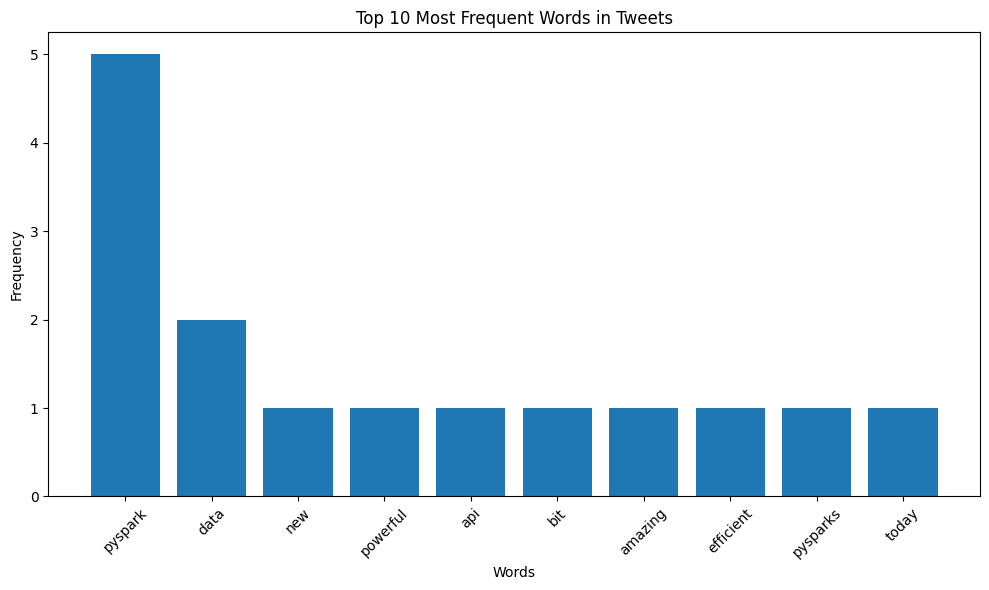

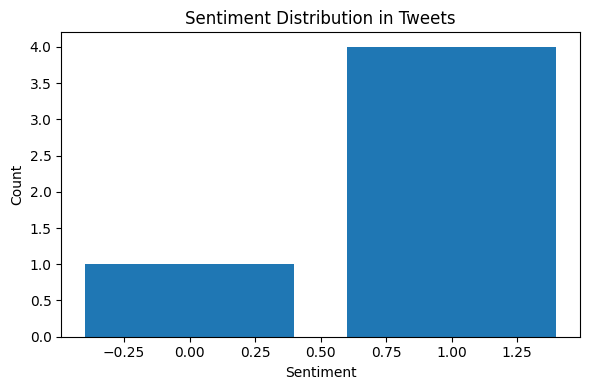

In [16]:
import matplotlib.pyplot as plt

# Example: Plot word frequencies
top_words = word_counts.limit(10).toPandas()
plt.figure(figsize=(10, 6))
plt.bar(top_words['word'], top_words['count'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example: Plot sentiment distribution
sentiment_counts = tweets_with_sentiment.groupBy('sentiment').count().toPandas()
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts['sentiment'], sentiment_counts['count'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in Tweets')
plt.tight_layout()
plt.show()